In [1]:
import pyfinancialdata
import numpy as np
import random
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

from datetime import datetime
from dateutil.parser import parse
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
data = pyfinancialdata.get(provider='histdata', instrument='SPXUSD', year=2017, time_group='60min')
data

,close,high,low,open,price
date,,,,,
2017-01-02 18:00:00,2243.00,2244.50,2241.00,2241.00,2243.00
2017-01-02 19:00:00,2241.00,2242.75,2240.25,2242.75,2241.00
2017-01-02 20:00:00,2242.50,2242.75,2240.00,2241.25,2242.50
2017-01-02 21:00:00,2243.50,2243.75,2242.00,2242.25,2243.50
2017-01-02 22:00:00,2244.50,2244.50,2243.50,2243.75,2244.50
...,...,...,...,...,...
2017-12-29 12:00:00,2684.50,2686.50,2684.00,2685.88,2684.50
2017-12-29 13:00:00,2682.50,2685.25,2681.25,2684.25,2682.50
2017-12-29 14:00:00,2683.25,2683.75,2682.00,2682.25,2683.25


In [3]:
import matplotlib.pyplot as plt

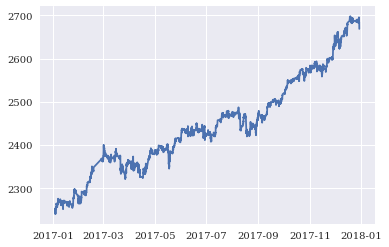

In [4]:
plt.plot(data['close'])

In [5]:
data = pyfinancialdata.get_multi_year(provider='histdata', instrument='SPXUSD', years=[2010,2011,2012,2013,2014, 2015, 2016, 2017,2018], time_group='60min')
data

,close,high,low,open,price
date,,,,,
2010-11-14 18:00:00,1197.00,1197.500,1195.00,1195.50,1197.00
2010-11-14 19:00:00,1198.25,1198.500,1196.50,1196.75,1198.25
2010-11-14 20:00:00,1199.00,1200.000,1197.75,1198.00,1199.00
2010-11-14 21:00:00,1197.25,1199.000,1196.75,1198.75,1197.25
2010-11-14 22:00:00,1195.50,1197.750,1195.25,1197.50,1195.50
...,...,...,...,...,...
2018-12-31 12:00:00,2500.87,2501.870,2489.87,2494.67,2500.87
2018-12-31 13:00:00,2496.87,2508.670,2496.37,2500.87,2496.87
2018-12-31 14:00:00,2494.17,2501.169,2485.87,2496.87,2494.17


In [6]:
data1 = data[(data.index.hour >=9 ) & (data.index.hour <=16)]
data1

,close,high,low,open,price
date,,,,,
2010-11-15 09:00:00,1199.50,1203.000,1199.50,1200.50,1199.50
2010-11-15 10:00:00,1200.75,1202.250,1197.25,1199.75,1200.75
2010-11-15 11:00:00,1204.50,1205.500,1199.00,1201.00,1204.50
2010-11-15 12:00:00,1204.00,1205.250,1201.75,1204.75,1204.00
2010-11-15 13:00:00,1203.50,1205.000,1202.00,1203.75,1203.50
...,...,...,...,...,...
2018-12-31 12:00:00,2500.87,2501.870,2489.87,2494.67,2500.87
2018-12-31 13:00:00,2496.87,2508.670,2496.37,2500.87,2496.87
2018-12-31 14:00:00,2494.17,2501.169,2485.87,2496.87,2494.17


In [7]:
b = data1['close'].groupby([data1.index.year,data1.index.month,data1.index.day] )

In [8]:
e = b.count().values
np.where(e==8)
good_day = b.count().index[np.where(e==8)]

In [9]:
good_day[0]

(2010, 11, 15)

In [10]:
from datetime import datetime
good_day_index = []
for i in range(len(good_day)):
    y,m,d=good_day[i]
    good_day_index.append(datetime(y,m,d).strftime('%Y-%m-%d'))  

In [11]:
len(good_day_index)

2017

In [12]:
good_day_index_plus = []
for i in good_day_index:
    good_day_index_plus.append(pd.Timestamp(i).to_period('D'))

In [13]:
len(data1.index.to_period('D').isin(good_day_index_plus))

16454

In [14]:
good_data_hfreq = data1[data1.index.to_period('D').isin(good_day_index_plus)]

In [15]:
good_data_hfreq

,close,high,low,open,price
date,,,,,
2010-11-15 09:00:00,1199.50,1203.000,1199.50,1200.50,1199.50
2010-11-15 10:00:00,1200.75,1202.250,1197.25,1199.75,1200.75
2010-11-15 11:00:00,1204.50,1205.500,1199.00,1201.00,1204.50
2010-11-15 12:00:00,1204.00,1205.250,1201.75,1204.75,1204.00
2010-11-15 13:00:00,1203.50,1205.000,1202.00,1203.75,1203.50
...,...,...,...,...,...
2018-12-31 12:00:00,2500.87,2501.870,2489.87,2494.67,2500.87
2018-12-31 13:00:00,2496.87,2508.670,2496.37,2500.87,2496.87
2018-12-31 14:00:00,2494.17,2501.169,2485.87,2496.87,2494.17


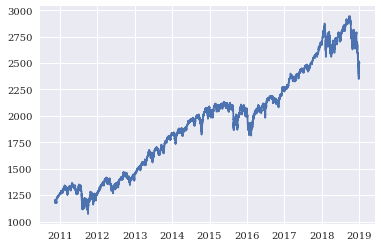

In [16]:
plt.plot(good_data_hfreq['close'])

In [17]:
data2 = pyfinancialdata.get_multi_year(provider='histdata', instrument='SPXUSD', years=[2010,2011,2012,2013,2014, 2015, 2016, 2017,2018], time_group='1d')
data2

,close,high,low,open,price
date,,,,,
2010-11-14,1198.000,1200.000,1195.000,1195.500,1198.000
2010-11-15,1193.250,1205.500,1188.750,1197.750,1193.250
2010-11-16,1179.250,1194.500,1170.750,1193.500,1179.250
2010-11-17,1186.250,1186.500,1173.250,1179.000,1186.250
2010-11-18,1195.000,1199.500,1184.250,1186.000,1195.000
...,...,...,...,...,...
2018-12-26,2465.969,2477.169,2322.969,2326.469,2465.969
2018-12-27,2502.870,2505.369,2397.270,2465.770,2502.870
2018-12-28,2486.270,2522.069,2472.470,2502.870,2486.270


In [18]:
good_data_lfreq = data2[data2.index.to_period('D').isin(good_day_index_plus)]

In [19]:
good_data_lfreq

,close,high,low,open,price
date,,,,,
2010-11-15,1193.250,1205.500,1188.750,1197.750,1193.250
2010-11-16,1179.250,1194.500,1170.750,1193.500,1179.250
2010-11-17,1186.250,1186.500,1173.250,1179.000,1186.250
2010-11-18,1195.000,1199.500,1184.250,1186.000,1195.000
2010-11-19,1198.000,1199.750,1187.500,1194.750,1198.000
...,...,...,...,...,...
2018-12-21,2410.569,2506.370,2407.569,2476.469,2410.569
2018-12-26,2465.969,2477.169,2322.969,2326.469,2465.969
2018-12-27,2502.870,2505.369,2397.270,2465.770,2502.870


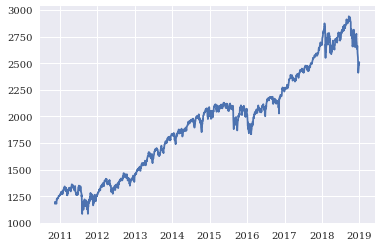

In [20]:
plt.plot(good_data_lfreq['close'])

In [21]:
df1 = good_data_lfreq[['close']]

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2017 entries, 2010-11-15 to 2018-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2017 non-null   float64
dtypes: float64(1)
memory usage: 31.5 KB


In [23]:
df1=df1.fillna(method='ffill')

In [24]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [25]:
df1['close'] = scaler.fit_transform(df1['close'].values.reshape(-1,1))

In [26]:
df1.head()

,close
date,
2010-11-15,-0.882860
2010-11-16,-0.897940
2010-11-17,-0.890400
2010-11-18,-0.880975
2010-11-19,-0.877743


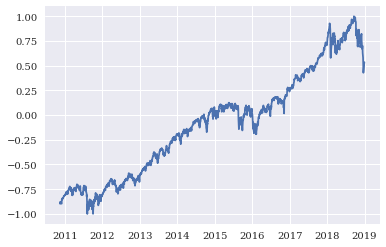

In [27]:
plt.plot(df1)

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [29]:
# Build model
#####################
# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True).cuda()

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim,device=x.device).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim,device=x.device).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0, c0))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

In [30]:
# function to create train, test data given stock data and sequence length
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]


In [31]:
look_back = 30 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df1, look_back)

In [32]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1590, 29, 1)
y_train.shape =  (1590, 1)
x_test.shape =  (397, 29, 1)
y_test.shape =  (397, 1)


In [33]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [34]:
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1
learning_rate = 0.01
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model = model.to(device)
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)
print(model)

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [35]:
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 1500:
        lr /= 10
    if epoch >= 2000:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [1840]:
# Train model
#####################
num_epochs = 2500
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    adjust_learning_rate(optimizer, t)
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

Epoch  10 MSE:  0.02221325971186161
Epoch  20 MSE:  0.00964538287371397
Epoch  30 MSE:  0.003577748779207468
Epoch  40 MSE:  0.002019574400037527
Epoch  50 MSE:  0.0011735401349142194
Epoch  60 MSE:  0.0009034791146405041
Epoch  70 MSE:  0.0007434423314407468
Epoch  80 MSE:  0.0007021183846518397
Epoch  90 MSE:  0.0006836277898401022
Epoch  100 MSE:  0.0006667231791652739
Epoch  110 MSE:  0.0006540720351040363
Epoch  120 MSE:  0.0006431755609810352
Epoch  130 MSE:  0.0006336470833048224
Epoch  140 MSE:  0.0006246845005080104
Epoch  150 MSE:  0.0006159428739920259
Epoch  160 MSE:  0.000607621914241463
Epoch  170 MSE:  0.0005994593957439065
Epoch  180 MSE:  0.0005914386129006743
Epoch  190 MSE:  0.0005835178308188915
Epoch  200 MSE:  0.0005757122999057174
Epoch  210 MSE:  0.0005679673049598932
Epoch  220 MSE:  0.0005604012403637171
Epoch  230 MSE:  0.0005527213215827942
Epoch  240 MSE:  0.0005452229524962604
Epoch  250 MSE:  0.0005377019406296313
Epoch  260 MSE:  0.0005302850040607154
Ep

Epoch  2110 MSE:  0.000272762612439692
Epoch  2120 MSE:  0.0002727378159761429
Epoch  2130 MSE:  0.00027275897446088493
Epoch  2140 MSE:  0.0002727725659497082
Epoch  2150 MSE:  0.00027277233311906457
Epoch  2160 MSE:  0.00027276831679046154
Epoch  2170 MSE:  0.00027277914341539145
Epoch  2180 MSE:  0.0002727834216784686
Epoch  2190 MSE:  0.00027277966728433967
Epoch  2200 MSE:  0.00027277693152427673
Epoch  2210 MSE:  0.00027278350898995996
Epoch  2220 MSE:  0.00027276092441752553
Epoch  2230 MSE:  0.00027272565057501197
Epoch  2240 MSE:  0.0002727439859881997
Epoch  2250 MSE:  0.0002727315586525947
Epoch  2260 MSE:  0.0002727501268964261
Epoch  2270 MSE:  0.00027275303727947176
Epoch  2280 MSE:  0.000272771023446694
Epoch  2290 MSE:  0.00027273435262031853
Epoch  2300 MSE:  0.00027272390434518456
Epoch  2310 MSE:  0.00027273493469692767
Epoch  2320 MSE:  0.0002727365936152637
Epoch  2330 MSE:  0.00027272998704575
Epoch  2340 MSE:  0.0002727355167735368
Epoch  2350 MSE:  0.00027276310

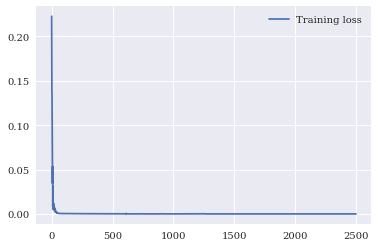

In [1841]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [1842]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.45 RMSE
Test Score: 25.12 RMSE


In [36]:
l = []
l2 = []
for i in range(1000):
    look_back = 30 # choose sequence length
    x_train, y_train, x_test, y_test = load_data(df1, look_back)
    x_train = torch.from_numpy(x_train).type(torch.Tensor)
    x_test = torch.from_numpy(x_test).type(torch.Tensor)
    y_train = torch.from_numpy(y_train).type(torch.Tensor)
    y_test = torch.from_numpy(y_test).type(torch.Tensor)
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    x_test = x_test.to(device)
    y_test = y_test.to(device)
    input_dim = 1
    hidden_dim = 32
    num_layers = 2 
    output_dim = 1
    learning_rate = 0.01
    model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
    model = model.to(device)
    loss_fn = torch.nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    num_epochs = 2000
    hist = np.zeros(num_epochs)

# Number of steps to unroll
    seq_dim =look_back-1  

    for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
        adjust_learning_rate(optimizer, t)
    # Forward pass
        y_train_pred = model(x_train)

        loss = loss_fn(y_train_pred, y_train)
        hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
        optimizer.zero_grad()

    # Backward pass
        loss.backward()

    # Update parameters
        optimizer.step()
        y_test_pred = model(x_test)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
    y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    l.append(trainScore)
    l2.append(testScore)

Train Score: 15.35 RMSE
Test Score: 27.12 RMSE
Train Score: 15.34 RMSE
Test Score: 26.67 RMSE
Train Score: 15.35 RMSE
Test Score: 30.95 RMSE
Train Score: 15.31 RMSE
Test Score: 28.62 RMSE
Train Score: 15.31 RMSE
Test Score: 26.35 RMSE
Train Score: 15.33 RMSE
Test Score: 26.25 RMSE
Train Score: 15.34 RMSE
Test Score: 28.78 RMSE
Train Score: 15.28 RMSE
Test Score: 41.01 RMSE
Train Score: 15.32 RMSE
Test Score: 28.44 RMSE
Train Score: 15.34 RMSE
Test Score: 43.34 RMSE
Train Score: 15.31 RMSE
Test Score: 27.05 RMSE
Train Score: 15.38 RMSE
Test Score: 29.22 RMSE
Train Score: 15.33 RMSE
Test Score: 49.85 RMSE
Train Score: 15.33 RMSE
Test Score: 34.82 RMSE
Train Score: 15.35 RMSE
Test Score: 28.51 RMSE
Train Score: 15.34 RMSE
Test Score: 26.28 RMSE
Train Score: 15.34 RMSE
Test Score: 28.93 RMSE
Train Score: 15.34 RMSE
Test Score: 31.56 RMSE
Train Score: 15.33 RMSE
Test Score: 26.46 RMSE
Train Score: 15.34 RMSE
Test Score: 29.73 RMSE
Train Score: 15.34 RMSE
Test Score: 33.47 RMSE
Train Score: 

KeyboardInterrupt: 

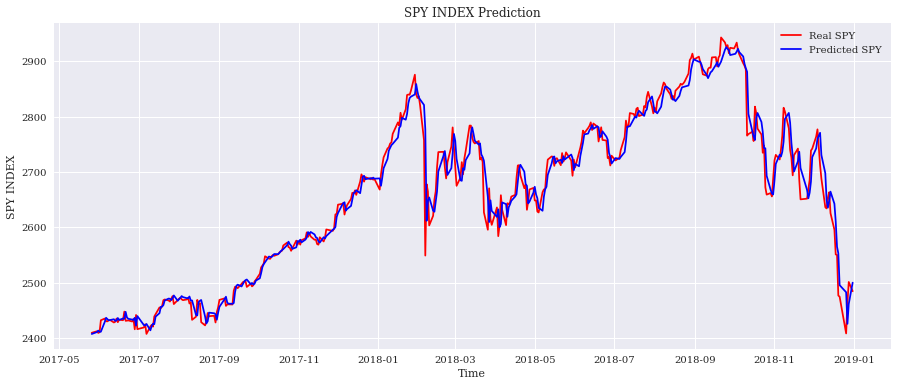

In [1843]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df1[len(df1)-len(y_test):].index, y_test, color = 'red', label = 'Real SPY')
axes.plot(df1[len(df1)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted SPY')
#axes.xticks(np.arange(0,394,50))
plt.title('SPY INDEX Prediction')
plt.xlabel('Time')
plt.ylabel('SPY INDEX')
plt.legend()
plt.savefig('SPY_pred.png')
plt.show()

In [40]:
df2=good_data_hfreq[['close']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16136 entries, 2010-11-15 09:00:00 to 2018-12-31 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   16136 non-null  float64
dtypes: float64(1)
memory usage: 252.1 KB


In [41]:
df2=df2.fillna(method='ffill')
df2['close'] = scaler.fit_transform(df2['close'].values.reshape(-1,1))

In [42]:
df2[:8]

,close
date,
2010-11-15 09:00:00,-0.863709
2010-11-15 10:00:00,-0.862373
2010-11-15 11:00:00,-0.858365
2010-11-15 12:00:00,-0.858899
2010-11-15 13:00:00,-0.859433
2010-11-15 14:00:00,-0.861571
2010-11-15 15:00:00,-0.868520
2010-11-15 16:00:00,-0.869054


In [43]:
df2[8:16]

,close
date,
2010-11-16 09:00:00,-0.877873
2010-11-16 10:00:00,-0.882149
2010-11-16 11:00:00,-0.889364
2010-11-16 12:00:00,-0.888562
2010-11-16 13:00:00,-0.886424
2010-11-16 14:00:00,-0.889898
2010-11-16 15:00:00,-0.888562
2010-11-16 16:00:00,-0.888830


In [44]:
len(df2)/8

2017.0

In [1724]:
df2.iloc[7,:],df2.iloc[15,:]

(close   -0.869054
 Name: 2010-11-15 16:00:00, dtype: float64,
 close   -0.88883
 Name: 2010-11-16 16:00:00, dtype: float64)

In [1755]:
# function to create train, test data given stock data and sequence length
def load_data_hfreq(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    iter_len = int((len(data_raw) - look_back)/8)
    # create all possible sequences of length look_back
    for index in range(1,iter_len+1):
        data.append(data_raw[index*8-1: index*8 + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size-1,1:,:]
    y_train = data[1:train_set_size,-1,:]
    
    x_test = data[train_set_size:-1,1:]
    y_test = data[train_set_size+1:,-1,:]
    
    return [x_train, y_train, x_test, y_test]


In [1756]:
look_back = 160 # choose sequence length
x_train, y_train, x_test, y_test = load_data_hfreq(df2, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1597, 160, 1)
y_train.shape =  (1597, 1)
x_test.shape =  (398, 160, 1)
y_test.shape =  (398, 1)


In [1757]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [1758]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [1760]:
model2 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model2 = model2.to(device)
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
print(model2)

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [1761]:
# Train model
#####################
num_epochs = 2000
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    adjust_learning_rate(optimizer, t)
    # Forward pass
    model2.train()
    y_train_pred = model2(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

Epoch  10 MSE:  0.016978910192847252
Epoch  20 MSE:  0.004755623172968626
Epoch  30 MSE:  0.0015019000275060534
Epoch  40 MSE:  0.0008702454506419599
Epoch  50 MSE:  0.0007400318281725049
Epoch  60 MSE:  0.0004380564496386796
Epoch  70 MSE:  0.00037059385795146227
Epoch  80 MSE:  0.00032025290420278907
Epoch  90 MSE:  0.0003060511080548167
Epoch  100 MSE:  0.00030104766483418643
Epoch  110 MSE:  0.00029783128411509097
Epoch  120 MSE:  0.0002960344427265227
Epoch  130 MSE:  0.0002947872562799603
Epoch  140 MSE:  0.00029376690508797765
Epoch  150 MSE:  0.0002929280453827232
Epoch  160 MSE:  0.00029221249860711396
Epoch  170 MSE:  0.0002915484074037522
Epoch  180 MSE:  0.0002910167968366295
Epoch  190 MSE:  0.00029050622833892703
Epoch  200 MSE:  0.00029005322721786797
Epoch  210 MSE:  0.00028969324193894863
Epoch  220 MSE:  0.0002893181808758527
Epoch  230 MSE:  0.0002890313044190407
Epoch  240 MSE:  0.00028873718110844493
Epoch  250 MSE:  0.0002884813293348998
Epoch  260 MSE:  0.0002882

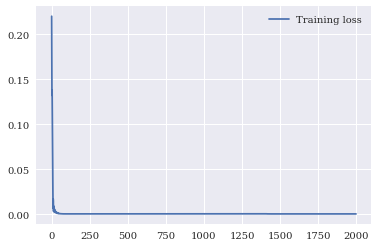

In [1762]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [1763]:
# make predictions
y_test_pred = model2(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.50 RMSE
Test Score: 28.99 RMSE


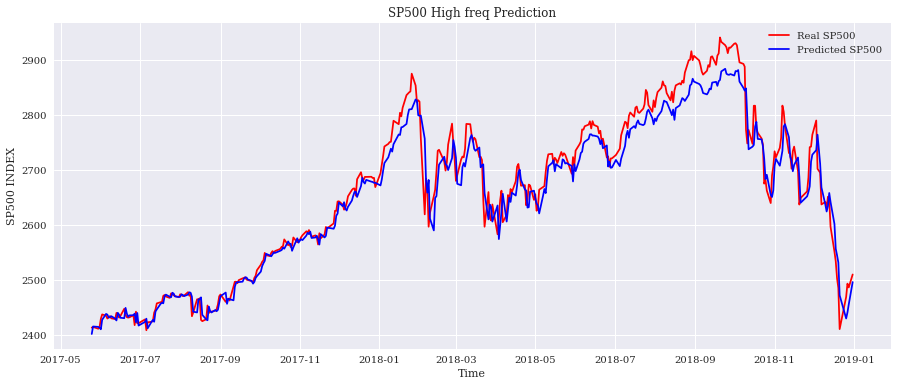

In [1764]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df1[len(df1)-len(y_test):].index, y_test, color = 'red', label = 'Real SP500')
axes.plot(df1[len(df1)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted SP500')
#axes.xticks(np.arange(0,394,50))
plt.title('SP500 High freq Prediction')
plt.xlabel('Time')
plt.ylabel('SP500 INDEX')
plt.legend()
plt.savefig('SP500_HFREQ_pred.png')
plt.show()

In [45]:
# function to create train, test data given stock data and sequence length
def load_data_lfreq(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back+1])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size-1,1:,:]
    y_train = data[1:train_set_size,-1,:]
    
    x_test = data[train_set_size:-1,1:]
    y_test = data[train_set_size+1:,-1,:]
    
    return [x_train, y_train, x_test, y_test]


In [46]:
def load_data_hfreq(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    iter_len = int((len(data_raw) - look_back)/8)
    # create all possible sequences of length look_back
    for index in range(1,iter_len+1):
        data.append(data_raw[index*8-1: index*8 + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size-1,1:,:]
    y_train = data[1:train_set_size,-1,:]
    
    x_test = data[train_set_size:-1,1:]
    y_test = data[train_set_size+1:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [503]:
# Build model
#####################
# Here we define our model as a class
class LSTM_MV(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM_MV, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim
        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True).cuda()

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        input_dim = self.input_dim
        num_layers = self.num_layers
        h0 = torch.zeros(num_layers, x.shape[0], self.hidden_dim,device=x.device).requires_grad_()
        #print(x.shape)
        #print(h0.shape)
        # Initialize cell state
        c0 = torch.zeros(num_layers, x.shape[0], self.hidden_dim,device=x.device).requires_grad_()
        #print(c0.shape)
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0, c0))
        #print(out.size)
        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1,:]) 
        # out.size() --> 100, 10
        return out

In [532]:
def load_data_mixedfreq(stock_low, stock_high, look_back_low):
    look_back_high = look_back_low*8
    [x_train_l, y_train_l, x_test_l, y_test_l] = load_data_lfreq(stock_low, look_back_low)
    [x_train_h, y_train_h, x_test_h, y_test_h] = load_data_hfreq(stock_high, look_back_high)
    print(x_train_l.shape)
    print(x_train_h.shape)
    l = len(x_train_l)
    l2 = len(x_test_l)
    k = look_back_low+look_back_high
    x_train = np.ones((l,k,1))
    x_test = np.ones((l2,k,1))
    for i in range(l):
        for j in range(x_train_l.shape[1]):
            x_train[i,j*9,0] = x_train_l[i,j,0]
            x_train[i,j*9+1:(j+1)*9,0] = x_train_h[i,j*8:(j+1)*8,0]
    for i in range(l2):
        for j in range(x_test_l.shape[1]):
            x_test[i,j*9,0] = x_test_l[i,j,0]
            x_test[i,j*9+1:(j+1)*9,0] = x_test_h[i,j*8:(j+1)*8,0]
    return [x_train, y_train_l, x_test, y_test_l]

In [551]:
x_train_m, y_train_m, x_test_m, y_test_m = load_data_mixedfreq(df1,df2, 15)
print('x_train.shape = ',x_train_m.shape)
print('y_train.shape = ',y_train_m.shape)
print('x_test.shape = ',x_test_m.shape)
print('y_test.shape = ',y_test_m.shape)

(1601, 15, 1)
(1601, 120, 1)
x_train.shape =  (1601, 135, 1)
y_train.shape =  (1601, 1)
x_test.shape =  (399, 135, 1)
y_test.shape =  (399, 1)


In [552]:
input_dim = 9
a = x_train_m.shape[1]
time_horizon = int(a/input_dim)
x_train_m = x_train_m.reshape(x_train_m.shape[0],time_horizon,input_dim)
x_test_m = x_test_m.reshape(x_test_m.shape[0],time_horizon,input_dim)
x_train_m.shape

(1601, 15, 9)

In [553]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train_m).type(torch.Tensor)
x_test = torch.from_numpy(x_test_m).type(torch.Tensor)
y_train = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test = torch.from_numpy(y_test_m).type(torch.Tensor)

In [554]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [555]:
input_dim = 9
hidden_dim = 64
num_layers = 2 
output_dim = 1
learning_rate = 0.01

model3 = LSTM_MV(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model3 = model3.to(device)
loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)

In [556]:
# Train model
#####################
num_epochs = 5000
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    adjust_learning_rate(optimizer, t)
    # Forward pass
    model3.train()
    y_train_pred = model3(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

Epoch  10 MSE:  0.02318643219769001
Epoch  20 MSE:  0.01500670425593853
Epoch  30 MSE:  0.0032027261331677437
Epoch  40 MSE:  0.0017297985032200813
Epoch  50 MSE:  0.000844032212626189
Epoch  60 MSE:  0.0006053137476556003
Epoch  70 MSE:  0.0005576628027483821
Epoch  80 MSE:  0.0005068366881459951
Epoch  90 MSE:  0.0004896061727777123
Epoch  100 MSE:  0.00048110817442648113
Epoch  110 MSE:  0.00047549285227432847
Epoch  120 MSE:  0.0004706353647634387
Epoch  130 MSE:  0.0004658022371586412
Epoch  140 MSE:  0.0004613220226019621
Epoch  150 MSE:  0.0004568364529404789
Epoch  160 MSE:  0.000452324136858806
Epoch  170 MSE:  0.0004479295457713306
Epoch  180 MSE:  0.0004435934533830732
Epoch  190 MSE:  0.00043928727973252535
Epoch  200 MSE:  0.0004349837254267186
Epoch  210 MSE:  0.00043082982301712036
Epoch  220 MSE:  0.0004266852920409292
Epoch  230 MSE:  0.00042258831672370434
Epoch  240 MSE:  0.0004186456208117306
Epoch  250 MSE:  0.0004147369181737304
Epoch  260 MSE:  0.0004109502478968

Epoch  2120 MSE:  0.0002831357123795897
Epoch  2130 MSE:  0.0002831067540682852
Epoch  2140 MSE:  0.00028308050241321325
Epoch  2150 MSE:  0.0002830962766893208
Epoch  2160 MSE:  0.0002831408637575805
Epoch  2170 MSE:  0.00028312389622442424
Epoch  2180 MSE:  0.000283124070847407
Epoch  2190 MSE:  0.0002831237798091024
Epoch  2200 MSE:  0.00028314447263255715
Epoch  2210 MSE:  0.0002831520396284759
Epoch  2220 MSE:  0.0002831507008522749
Epoch  2230 MSE:  0.00028312898939475417
Epoch  2240 MSE:  0.00028313693474046886
Epoch  2250 MSE:  0.00028314406517893076
Epoch  2260 MSE:  0.0002831342862918973
Epoch  2270 MSE:  0.0002831029414664954
Epoch  2280 MSE:  0.0002831208403222263
Epoch  2290 MSE:  0.0002831268066074699
Epoch  2300 MSE:  0.0002830849844031036
Epoch  2310 MSE:  0.0002831246820278466
Epoch  2320 MSE:  0.0002831365854945034
Epoch  2330 MSE:  0.0002831103338394314
Epoch  2340 MSE:  0.00028311903588473797
Epoch  2350 MSE:  0.00028310850029811263
Epoch  2360 MSE:  0.0002830895828

Epoch  4160 MSE:  0.000282371009234339
Epoch  4170 MSE:  0.0002823852701112628
Epoch  4180 MSE:  0.0002823876275215298
Epoch  4190 MSE:  0.0002823987160809338
Epoch  4200 MSE:  0.0002823799441102892
Epoch  4210 MSE:  0.00028237863443791866
Epoch  4220 MSE:  0.00028234784258529544
Epoch  4230 MSE:  0.00028234804631210864
Epoch  4240 MSE:  0.0002823538379743695
Epoch  4250 MSE:  0.00028235954232513905
Epoch  4260 MSE:  0.00028234338969923556
Epoch  4270 MSE:  0.00028234560159035027
Epoch  4280 MSE:  0.0002823156537488103
Epoch  4290 MSE:  0.0002823157119564712
Epoch  4300 MSE:  0.0002823237155098468
Epoch  4310 MSE:  0.0002823679242283106
Epoch  4320 MSE:  0.0002823191462084651
Epoch  4330 MSE:  0.00028232953627593815
Epoch  4340 MSE:  0.0002822948736138642
Epoch  4350 MSE:  0.00028229039162397385
Epoch  4360 MSE:  0.0002822649257723242
Epoch  4370 MSE:  0.00028227653820067644
Epoch  4380 MSE:  0.0002822540409397334
Epoch  4390 MSE:  0.00028224504785612226
Epoch  4400 MSE:  0.00028226984

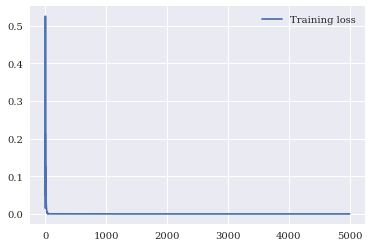

In [557]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [558]:
# make predictions
y_test_pred = model3(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.70 RMSE
Test Score: 74.05 RMSE


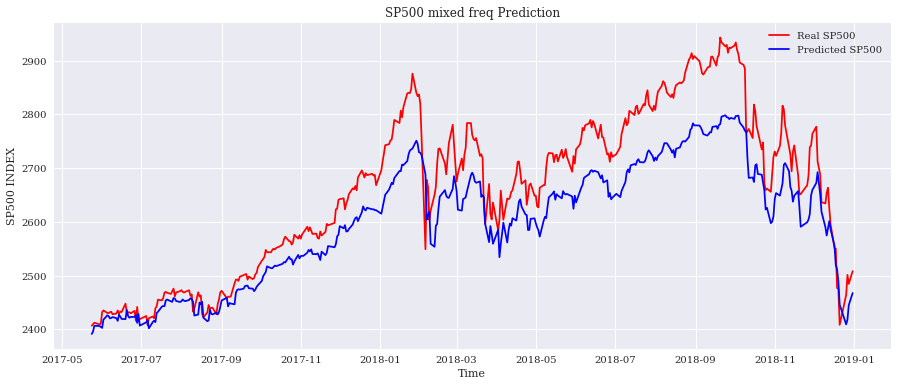

In [559]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df1[len(df1)-len(y_test):].index, y_test, color = 'red', label = 'Real SP500')
axes.plot(df1[len(df1)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted SP500')
#axes.xticks(np.arange(0,394,50))
plt.title('SP500 mixed freq Prediction')
plt.xlabel('Time')
plt.ylabel('SP500 INDEX')
plt.legend()
plt.savefig('SP500_HFREQ_pred.png')
plt.show()